In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA



In [16]:
df = pd.read_csv('input/input_1.csv')

In [17]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53798 entries, 0 to 53797
Data columns (total 31 columns):
League         53798 non-null object
Season         53798 non-null object
Stage          53798 non-null object
Player         53798 non-null object
Team           53787 non-null object
GP             53798 non-null int64
MIN            53798 non-null float64
FGM            53798 non-null int64
FGA            53798 non-null int64
3PM            53798 non-null int64
3PA            53798 non-null int64
FTM            53798 non-null int64
FTA            53798 non-null int64
TOV            53798 non-null int64
PF             53798 non-null int64
ORB            53798 non-null int64
DRB            53798 non-null int64
REB            53798 non-null int64
AST            53798 non-null int64
STL            53798 non-null int64
BLK            53798 non-null int64
PTS            53798 non-null int64
birth_year     53479 non-null float64
birth_month    53479 non-null object
birth_date     53

In [19]:
df.League.unique()

array(['NBA', 'Euroleague', 'Israeli-BSL', 'Argentinian-Liga-A',
       'Australian-NBL', 'Austrian-A-Bundesliga', 'Balkan-BIL',
       'Belarusian-BPL', 'Belgium-Scooore-League', 'Bosnian-BiH-Liga',
       'Brazilian-NBB', 'British-BBL', 'Bulgarian-NBL', 'Canadian-NBL',
       'Chinese-CBA', 'Croatian-A-1-Liga', 'Czech-NBL',
       'Danish-Basketligaen', 'Estonian-Latvian-Basketball-League',
       'Eurocup', 'FIBA-Europe-Cup', 'Finnish-Korisliiga',
       'French-Jeep-Elite', 'Georgian-Super-Liga', 'German-BBL',
       'Greek-HEBA-A1', 'Hungarian-NBIA', 'Italian-Lega-Basket-Serie-A',
       'Japanese-BLeague', 'Kosovo-FBK', 'Lebanese-Division-A',
       'Lithuanian-LKL', 'Luxembourg-Total-League',
       'Macedonian-Superleague', 'Mexican-LNBP', 'Netherlands-DBL',
       'New-Zealand-NBL', 'Norwegian-BLNO', 'Polish-TBL',
       'Romanian-Divizia-A', 'Serbian-KLS', 'Slovakian-Extraliga',
       'Slovenian-SKL', 'South-Korean-KBL', 'Spanish-ACB',
       'Swedish-Basketligan', 'Swiss-LN

In [20]:
df.dropna(inplace=True)

In [21]:
df1 = df.drop(['nationality','high_school','League', 'Season', 'Stage', 'Player', 'Team','birth_month', 'birth_date','height'], axis=1)

In [22]:
df1.columns

Index(['GP', 'MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF',
       'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'birth_year',
       'height_cm', 'weight', 'weight_kg'],
      dtype='object')

In [23]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [24]:
principalDf.head()

,principal component 1,principal component 2
0,2821.836261,1287.044276
1,2501.771241,932.812525
2,2447.636458,744.375184
3,2089.363886,938.943947
4,1994.055890,913.078111


In [25]:
finalDf = pd.concat([principalDf, df[['birth_month']]], axis = 1)

In [26]:
df.birth_month.unique()

ax = fig.add_subplot(1,1,12) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

array(['Aug', 'Jul', 'Oct', 'Sep', 'Jun', 'Dec', 'Mar', 'Nov', 'Apr',
       'Jan', 'May', 'Feb'], dtype=object)

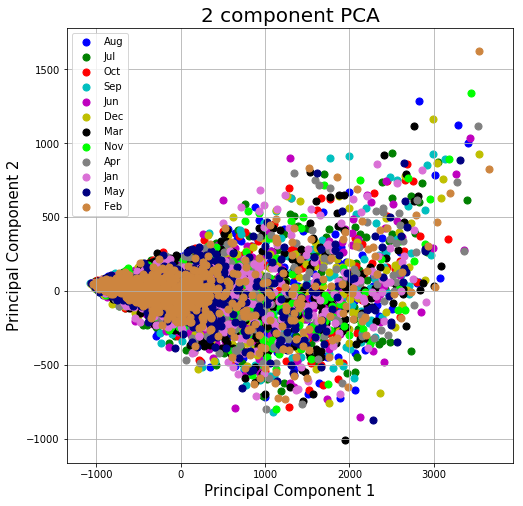

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Aug', 'Jul', 'Oct', 'Sep', 'Jun', 'Dec', 'Mar', 'Nov', 'Apr','Jan', 'May', 'Feb']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'grey','orchid','navy','peru']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['birth_month'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()